### C4021 - Group 4.2 
### Project work Weeks 7-9

#### Machine Learning Algorithm: Random Forests
Random Forests: 

-This article was a great source of help: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

-This implementation was also a useful reference: https://www.kaggle.com/niklasdonges/end-to-end-project-with-python



#### Dataset Information
_Source:_ https://www.kaggle.com/shrutimehta/nasa-asteroids-classification (source: Shruti Mehta)

**Content**
The data is about Asteroids - NeoWs. NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

**Acknowledgements**
Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

**Inspiration**
Finding potential hazardous and non-hazardous asteroids
Features responsible for claiming an asteroid to be hazardous

#### Notebook Structure
1. Data Loading and Pre-processing
2. Model training and testing
3. Model graphing
4. Model analysis: further eaxamination of significant features etc.

#### Team Contributions:
**Training data**

29-OCT-2018 B.Parle Source data identified, loaded and initial analysis. The data field 'Hazardous' is the Classification output: i.e. Hazardous Y or N

30-OCT-2018 B.Parle This article suggests SVM might be better for a binary classification problem like the one I propose: https://www.datasciencecentral.com/profiles/blogs/how-to-choose-a-machine-learning-model-some-guidelines?linkId=58574007


**Pre-processing**

31-OCT-2018 B.Parle Removed unnecessary columns and features with single values


**Algorithm training and evaluation**

02-NOV-2018 B.Parle Added the Train and Test code



**Visualisation of outputs**

30-OCT-2018 _name_ _contribution_




In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
####################
#
# 1. Dataset Loading and Pre-processing
#
####################
nasa_data = pd.read_csv('nasa.csv')
#nasa_data.head()
nasa_data.describe()

#Issues found during initial analysis that will need to be resolved:
#1. 2 columns contain repeated data: "Est Dia in KM(min)", "Est Dia in KM(max)" 
#.  are similar to these 2 fields: "Est Dia in M(min)", "Est Dia in M(max)"
#2. These fields are superflous: "Est Dia in Miles(max)","Est Dia in Feet(min)"
#3. 'object' data types that will need processing before they can be used in the learning model
#    Objects: Close Approach Date, Orbiting Body, Orbit Determination Date, Equinox

#1 and 2: drop extra columns with measurements in km, miles and inches
nasa_data = nasa_data.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)'], axis=1)

#3. Object types

#Close Approach Date: Drop this until we determine a use
nasa_data = nasa_data.drop(['Close Approach Date'], axis=1)

#Orbiting Body
nasa_data['Orbiting Body'].unique()

#Only 1 value in 'Orbiting body', so we can drop this column
nasa_data = nasa_data.drop(['Orbiting Body'], axis=1)

#Orbit Determination Date: Drop this until we determine a use
nasa_data = nasa_data.drop(['Orbit Determination Date'], axis=1)

#Equinox
nasa_data['Equinox'].unique()

#Only 1 value in 'Equinox', so we can drop this column
nasa_data = nasa_data.drop(['Equinox'], axis=1)

nasa_data.shape
#30 features and 4687 samples

(4687, 30)

In [30]:
####################
#
# 1. Train & Test
#
####################

#Take the result vector (y) into a separate dataframe
nasa_data_y = nasa_data.iloc[::,29]
nasa_data_x = nasa_data.iloc[::,0:28]

#nasa_data_y.head()
#nasa_data_x.head()

#Prior to training, scale the data
nasa_data_x_scaled = preprocessing.scale(nasa_data_x)
#print('x scaled = {}'.format(nasa_data_x_scaled.shape))
#print('y = {}'.format(nasa_data_y.shape))


#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(nasa_data_x_scaled, nasa_data_y, test_size=0.6, random_state=39)

#print('x train = {}'.format(X_train.shape))
#print('x test = {}'.format(X_test.shape))
#print('y train = {}'.format(y_train.shape))
#print('y test = {}'.format(y_test.shape))

#Fit the model
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=33)
rfc.fit(X_train, y_train)

#score the model using the test dataset
rfc_score = rfc.score(X_test,y_test)
print('Overall score = {}%'.format(round(rfc_score * 100, 2)))
print('feature importances {}'.format(rfc.feature_importances_))

/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Overall score = 89.34%
feature importances [3.93843433e-02 4.44014637e-02 1.29593080e-01 1.30968708e-01
 1.03136672e-01 2.40970633e-05 1.36361553e-02 7.70981951e-03
 9.76373546e-03 1.68446546e-02 1.36857845e-02 1.14453029e-02
 7.79113833e-03 1.14287146e-01 5.92346763e-02 1.91754910e-01
 7.59770862e-03 0.00000000e+00 1.77750688e-02 1.66093038e-03
 7.38407430e-03 3.25224320e-06 1.13537201e-02 5.69403860e-02
 7.38119228e-04 1.16081761e-03 8.93498409e-04 8.30737584e-04]


<BarContainer object of 28 artists>

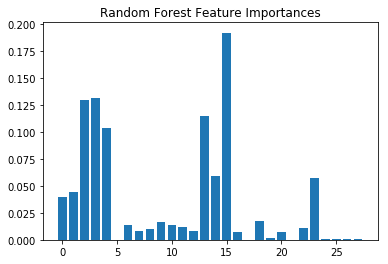

In [31]:
#graph the feature_importances
_,my_plt = plt.subplots()
my_plt.set_title('Random Forest Feature Importances')
x_val = np.arange(len(rfc.feature_importances_))
my_plt.bar(x_val,height=rfc.feature_importances_)

#### Summary of observations